
# Finding the least Volatile Stock

## Introduction:

Volatility is a statistical measure of the dispersion of returns for a given stock or market index. In most cases, the higher the volatility, the riskier the stock. There are multiple ways to calculate volatility. For the purpose of this project, we will take a look at the following methods: 

1. **Average True Range and Percentage True Range**
2. **Standard Deviation**
3. **Beta Coefficient**

## Data

The data used in the project is as follows: 

1. AlphaAdvantage Stock API: 
<br>About: Alpha Vantage provides enterprise-grade financial market data through a set of powerful and developer-friendly APIs. 
<br>Reasoning: We have used this data to get Intraday price values, getting latest day price.
<br>Format: **JSON**
<br>Source: https://www.alphavantage.co/

2. NASDAQ and NYSE Daily Stock Data:
<br>About: The data contains Date, Volume, High, Low, and Closing Price (for all NASDAQ and NYSE listed companies). Updated weekly. **For the purpose of the project, we will only take data of Apple, Facebook, Amazon, AMC, and American Airlines.**
<br>Reasoning: We have used this data to get historical daily prices of each stock.
<br>Format: **CSV**
<br>Source: https://www.kaggle.com/paultimothymooney/stock-market-data/version/41

3. S&P 500 Index Data:
<br>About: The data contains dates and prices of S&P500 index since 2006 to present day.
<br>Reasoning: We have used S&P 500 as a benchmark to compare stocks with overall S&P500 market. It will be used to calculate Beta of the stock.
<br>Format: **CSV**
<br>Source: https://www.investing.com/indices/us-spx-500-historical-data

## Summary of Functions Used in The Project: 


1. **errorHandleMain(stockListMain, start, stop):** The function takes all the global variables and checks if they are compatible for the rest of code.

2. **errorHandleStockCode(stockCode):** checks the stockCode variable passed to each function and makes sure it is present in our main StockList

3. **getData(stockList, timeType):** The function takes a list of stock and the time period and calls the API to access data for stock in the list. It returns a dictonary where keys are stock codes and values are their respective dataframes.

4. **ATR(stockCode):** The ATR function takes in a stock code, and returns the average true range of the stock. Uses data that is returned from getData function. 

5. **PVM(stockCode):** The function returns the Percentage Volatility Measure for the stock. It is used over ATR since it is a more standardized measure of volatility.

6. **stockStd(stockCode, start, stop):** The function returns the Standard Deviation of Stock Prices over a certain period of time. 

7. **sandpComp(stockCode, start, stop):** This function takes a stock code and a particular time period and then returns a dataframe with the closing prices of the stock with the respective closing prices of S&P500 index. 

8. **Beta(stockCode, start, stop):** This function takes the time period and stock code and returns the Beta Coefficient of the stock. 

9. **dailyV(stockCode):** This function take a particular stock code and returns number of Increases and Decreases of The Stock's Price in a single day.

10. **timePeriodV(stockCode, start, stop):** This function take a particular stock code and returns number of Increases and Decreases of The Stock's Price in the Specified Time Period.

11. **priceGraph(stockCode, start, stop):** This function takes a stock code, start and end time and returns the growth graph of the stock over the time period.

12. **getAveragePrice(stockCode, start, stop):** This function takes the stock code and start and end time and gives us the average stock price over the time period.

13. **createTable(stockCList, start, stop):** This function takes the stockList, start and end time and creates a summary table for the user.


## Stocks Being Evaluated 
### (could be changed to include more or other stocks depending on user input)
1. **Apple (AAPL)** because it is known to be a good stock
2. **Amazon (AMZN)** also because it is known to be a good stock
3. **American Airlines (AAL)** because we dislike their flight quality
4. **AMC (AMC)** because we thought the stock would be very volatile 
5. **Facebook (FB)** because their stock has been trending down

## Sources of Data
https://www.investopedia.com/terms/s/standarddeviation.asp

https://www.investopedia.com/terms/b/beta.asp

https://www.investopedia.com/terms/v/volatility.asp

https://www.investopedia.com/terms/g/growthrates.asp


## Importing the CSV Data

In [149]:
import requests
import pandas as pd
import statistics
import requests
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates


#Importing CSV stock data of the stocks we are going to analyze and create a new column called code
apple = pd.read_csv('aapl.csv')
apple["Code"] = "AAPL"

americanAir = pd.read_csv('aal.csv')
americanAir["Code"] = "AAL"

amazon = pd.read_csv('amzn.csv')
amazon["Code"] = "AMZN"

amc = pd.read_csv('amc.csv')
amc["Code"] = "AMC"

fb = pd.read_csv('FB.csv')
fb["Code"] = "FB"

blue = pd.read_csv('BLUE.csv')
blue["Code"] = "Blue"

#Import S&P 500 (Daily Dates since 10/20/2016)
sandp = pd.read_csv('sp500.csv')

## Getting user data and setting them as global variables
These variables will be casted to our future functions and used throughout the project

In [146]:
startDateMain = "10-17-2018" # program will collect collect data over the past 3 years 
stopDateMain = "10-17-2021"
stockListMain = ["AAPL","AAL","AMZN", "AMC", "FB"]

## Error Handling
Fucntions to be used to make sure the rest of the code will run as intended

In [147]:
stockListTry = ["AAPL"]
startDateTry = "01"
stopDateTry = "01-30-2021"
def errorHandleMain(stockListMain, start, stop):

    """
    What it does : checks the global variables and makes sure they will be compatible with the data
    Inputs:
        All the global variables we have, stockListMain, start, and stop  
    Outputs:
        Returns 1 if it passes the tests
        Returns 0 if it doesn't
    """
   
    startDateBool = True
    try:
        startDate = pd.to_datetime(start)
    except ValueError:
        startDateBool = False
       
    stopDateBool = True
    try:
        stopDate = pd.to_datetime(stop)
    except ValueError:
        startDateBool = False
   
   
    if stockListMain == []:
        print("Stock List is Empty")
        return 0
   
    if startDateBool == False:
        print("invalid start date")
        return 0
    if stopDateBool == False:
        print("invalid end date")
        return 0
   
    return 1

def errorHandleStockCode(stockCode):
    """
    What it does : checks the stockCode variable passed to each function and makes sure it is present in our main StockList
    Inputs:
        The stock code        
    Outputs:
        Returns 1 if it passes the tests
        Returns 0 if it doesn't
   
    """
   
    if stockCode not in stockListMain:
        print("invalid stockCode")
        return 0
    else:
        return 1

In [148]:
assert errorHandleMain(["AAPL"], "01",  "01-30-2021") == 0
assert errorHandleMain([], "01",  "01-30-2021") == 0
assert errorHandleMain(["AAPL"], "01-30-2020",  "01-30-2021") == 1

invalid start date
Stock List is Empty


## Calling API, Fixing it and Importing Data in a Combined Dictonary
The alphaadvantage API that we are using is a free version and only allows 5 calls every minute and 500 call.

In [74]:
import time

def getData(stockList, timeType):
    """
    What it does: 
        Because our API only allowed 5 calls per minute, we had to reevaluate the way we were getting our data from the API.
        Our solution was to make this function, which takes in a list of stocks and the requested time period, and gets the data 
        for all the stocks in the list from the API, and returns it to a dictionary with stock code as the keys and 
        the retrieved stock data as the value. If the stock list was longer than 5, we also coded in a pause, where the code
        would wait 60 seconds before calling the API again.
        
    Inputs:
        Stocklist : the list of stocks for which the data is being retrieved
        timeType : either daily (intraday) or over 3 weeks
        
    Returns:
        Dictionary of stock and data values
    """
    #resetting the api
    time.sleep(60)
    BigData = {}
    stockList.insert(0,'')
    for i in range(1, len(stockList)): #iterating through each stock in stock list to get its data and append it to the bigData dict
        stock = stockList[i]
        apiKey = "8KUJ36BZP06HRKQR"
        url = 'https://www.alphavantage.co/query?function=' + timeType + '&symbol=' + stock + '&interval=5min&apikey=' + apiKey
        r = requests.get(url)
        data = r.json()
        BigData[stockList[i]] = data 
        if(i%5 == 0):   #every five stocks in the list the program pauses for a minute to allow API reset
            time.sleep(60)
    return(BigData)

stockDataIntraDay = getData(stockListMain, 'TIME_SERIES_INTRADAY')
time.sleep(60)
stockDataDaily = getData(stockListMain, 'TIME_SERIES_DAILY_ADJUSTED')

## Creating a Combined Dataframe with All Stocks
In this next section we create a list of the stocks we are analyzing. This makes it easier to perform opperations on them as a group. 
<br>We then use the concatenate function to then merge each of the stocks in stock list together. 
<br>Next, we will make the data tidy by setting our independent variables. We will also add an extra column that analyzes amount increased everyday. 

In [150]:
#creating a list of each stock we will use, makes certain operations easier to do
stockList = [apple, americanAir, amazon, amc, fb]
stockCodeList = ["AAPL","AAL","AMZN", "AMC", "FB"] #

stocks = pd.concat(stockList) #merging everything in stockList
stocks["Date"] = pd.to_datetime(stocks.Date)

stocks = stocks.set_index(["Code"])           #setting the indexes of the dataframe to abide by the rules of tidy data

stocks = stocks.astype({"Low":float, "Open":float,"Volume":float,"High":float,"Close":float,"Adjusted Close":float})

stocks["Amount Increased"] = stocks["Close"] - stocks["Open"]          #adding a column that computes the amount the stock rose or declined by over a day


# Finding Stock Volatility 

### 1. True Range, Average True Range and Percentage Average True Range of Stock

The average true range (ATR) is a market volatility indicator used in technical analysis. The ATR may be used by market technicians to enter and exit trades, and is a useful tool to add to a trading system. It was created to allow traders to more accurately measure the daily volatility of an asset by using simple calculations. The indicator does not indicate the price direction; rather it is used primarily to measure volatility caused by gaps and limit up or down moves. 


![title](atrformula1.png)

### Average True Range

In [151]:
import numpy as np 


def ATR(stockCode):
    """
    Input: The code of the stock. For eg. "AAPL"
    Output: The average true range of the stock
    What the function does: The function ATR finds the True Range over a period of latest 14 days.
    True Range = The maximum value of high - low, absolute value of high - previous day close, and aboslute value of low - previous
    day close. 
    We then find the average of true range over a period of 14 days. 
    """

    if errorHandleStockCode(stockCode) == 0:
        return 0
    
    data = stockDataDaily[stockCode] #extracting the data from the massive stock-data dictonary
    keys = list(data['Time Series (Daily)'].keys()) #getting the keys and typecasting to list so it is iterable
    
    TrueRange = [] #defining True Range Dictonary
    for i in range(1, len(keys[0:15])): #we do it from 0 to 15 because since we use previous price, we will have to disregard high and low of first date
        
        CurrentHigh = float(data['Time Series (Daily)'][keys[i]]['2. high'])
        CurrentLow = float(data['Time Series (Daily)'][keys[i]]['3. low'])
        PreviousClose = float(data['Time Series (Daily)'][keys[i-1]]['4. close'])
        
        HighLow = CurrentHigh - CurrentLow
        HighPrevClose = np.abs(CurrentHigh - PreviousClose)
        LowPrevClose = np.abs(CurrentLow - PreviousClose)
        
        TrueRange.append(max([HighLow, HighPrevClose, LowPrevClose]))
    ATR = sum(TrueRange)/14
    return ATR

ATR('AAL')

0.7018000000000002

In [152]:
#asserts
assert(ATR("AAPL")) == 3.081214285714284
assert(ATR("AMZN")) == 75.57664285714284
assert(ATR("AAL")) == 0.7018000000000002

### Percentage Volatality Measure

The disadvantage of using ATR as a measure of volitility is that it is not a good measure to compare different stocks. 
It is good only if we are comparing the same stock at different time intervals. 

Therefore, we standardize the ATR by finding the Percentage Volatility Measure (PVM) which is nothing but ATR/Latest price of stock. This allows us to compare different stocks. 

In [160]:
def PVM(stockCode):
    """
    Input: Stock Code
    Output: Percentage Volatility Measure
    Description: The PVM function uses the above ATR function to get the ATR of stockCode. It is then divided by the latest
    price of the stockCode stock from the API and return the PVM. 
    """
        
    if errorHandleStockCode(stockCode) == 0:
        return 0
    
   
    
    data = stockDataIntraDay[stockCode] #extracting the data
    keys = list(data['Time Series (5min)'].keys()) #getting the keys
    latestUpdatedPriceTimestamp = (keys[0]) #getting the latest price timestamp
    return ATR(stockCode) / float(data['Time Series (5min)'][latestUpdatedPriceTimestamp]['4. close']) #dividing the ATR by latest price

PVM("AMC")

0.07377061855670101

In [161]:
#asserts
assert(PVM("AMZN")) == 0.022098433583959895
assert(PVM("AAPL")) == 0.020658493367175887
assert(PVM("AMC")) == 0.07377061855670101

## 2. Standard Deviation

Standard deviation is an especially useful tool in investing and trading strategies as it helps measure market and security volatility—and predict performance trends. As it relates to investing, for example, an index fund is likely to have a low standard deviation versus its benchmark index, as the fund's goal is to replicate the index.

In [162]:
def stockStd(stockCode, start, stop):
    '''
    What it does: Calculates the volatility index of a stock over a provided time period. 
    Inputs:
        stockCode : the code of the stock to find the volatility of
        start : the starting date
        stop : the closing date
    Returns :
        standard Deviation : the standard deviation of the stock
    '''
        
    if errorHandleStockCode(stockCode) == 0:
        return 0
    

    if((start == " ")|(stop == " ")):
        return 0
    #init
    startDate = pd.to_datetime(start)
    stopDate = pd.to_datetime(stop)
    total = 0            # total number of times the stock was measured
    positives = 0
    negatives = 0
    volatility = 0
    
    data = stocks.loc[(stockCode)] #finding all indexes that match the provided stockcode in the stocks dataframe
    data = data.loc[(data.Date >= startDate) & (data.Date <= stopDate)]
    
    data["Dev"] = 0
    data["Squared Dev"] = 0

    #calculations
    mean = 0
    length = len(data["Date"])

    #calculating the mean
    for rowLabel, rowSeries in data.iterrows():
        total += rowSeries["Close"]

    mean = total/length

    x = 0 
  
    #calculating the deviation of each value
    for rowLabel, rowSeries in data.iterrows():
        rowSeries["Dev"] = rowSeries["Close"] - mean
        rowSeries["Squared Dev"] = ((rowSeries["Dev"])**2) #squaring the deviations
        x += rowSeries["Squared Dev"]     #adding up all the squared deviations
       
    variance = x/length
    volatility = (variance ** (1/2))
    return volatility
stockStd("AMZN", startDateMain, stopDateMain)

594.928974550193

In [163]:
#asserts
assert stockStd("AAPL", startDateMain, stopDateMain) == 27.611929634020115
assert stockStd("AMZN", startDateMain, stopDateMain) == 594.928974550193

## 3. Beta Coefficient (Comparision with S&P 500)

Beta is a measure of a stock's volatility in relation to the overall market. By definition, the market, such as the S&P 500 Index, has a beta of 1.0, and individual stocks are ranked according to how much they deviate from the market.

A stock that swings more than the market over time has a beta above 1.0. If a stock moves less than the market, the stock's beta is less than 1.0. High-beta stocks are supposed to be riskier but provide higher return potential; low-beta stocks pose less risk but also lower returns.

There are two methods available to measure a stock’s beta. Both are expected to result in the same numerical outcome.

1. **Beta = Covariance / Variance:**
<br>Where covariance is the stock’s return relative to the market's return. Variance shows how the stock moves in relation to the market. We used covariance to determine if the market and American Express moved in the same direction today. Variance would see if American Express and the market moved the same amount. If the market went up 0.5% today, did American Express also go up 0.5%? Or did it go up by less than 0.5% or by more than 0.5%?

2. **Beta: y= a + (b*x):**
<br>Another way to calculate beta is to use a linear regression formula. Where beta is the coefficient of the independent variable (x in the equation), y is the dependent variable, a is the y-intercept or constant, and b is the slope of the line.

#### Since both measurements provide us with the same answer, this project will outline how to use the regression formula y = a + (b * x) where x is the beta.


In [358]:
import numpy as np
from sklearn.linear_model import LinearRegression
sandp["Date"] = pd.to_datetime(sandp.Date)

def sandpComp(stockCode, start, stop):
    
        
    if errorHandleStockCode(stockCode) == 0:
        return 0
    
    """
    
    Input: Stock Code, Start Date and Stop Date over which the user wants the data
    Output: Dataframe with the Closing prices of stock and its respective S&P 500 Closing Price
    What it does: The data extracts closing prices from both data frames and appends it to the new one
    """
    
    startDate = pd.to_datetime(start) #converting data to pandas data
    stopDate = pd.to_datetime(stop)    
    data = stocks.loc[(stockCode)] #finding all indexes that match the provided stockcode in the stocks dataframe
    data = data.loc[(data.Date >= startDate) & (data.Date <= stopDate)]
   
    stockDates = []
    stockClosings = []
    sandpDates = []
    sandpClosings = []
    for row, rowSeries in data.iterrows():
        stockDates.append(rowSeries["Date"])
        stockClosings.append(rowSeries["Close"])
       
    for row, rowSeries in sandp.iterrows():
        sandpDates.append(rowSeries["Date"])
        sandpClosings.append(rowSeries["Price"])
   
   
    stockDf = pd.DataFrame({"Date" : stockDates, "Stock Price" : stockClosings})
    sandpDf = pd.DataFrame({"Date" : sandpDates, "SandP Price" : sandpClosings})
   
   
    combDf = pd.merge(stockDf, sandpDf, on = "Date", how = "inner")
    combDf.sort_values(by='Date',ascending=False)
    return combDf

In [349]:
def Beta(stockCode, start, stop):
    
    """
    Input: Stock Code, Start Date and Stop Date over which the user wants the data
    Output: Beta Coefficient
    Description: 
        1. First, the function cleans up the data by removing NA values and converting Closing prices to float
        2. Next, we create 2 lists that input take the difference of the current day's close and previous day's close and divide it
        by the previous day's close. This formula standardises the difference so we can compare both the stock and S&P 500.
        3. Create a Dataframe of the standardized data. 
        4. Creating the Regression
    """
    
        
    if errorHandleStockCode(stockCode) == 0:
        return 0
    
    combData = sandpComp(stockCode, start, stop) #Importing the Data
    
    #Cleaning the Data
    combData.dropna()
    combData = combData.replace(',','', regex=True)
    
    #Appending Standardized Data
    stdStock = []
    stdSP = []
    for i in range(1, len(combData['Stock Price'])):
        stdStock.append((combData['Stock Price'][i] - combData['Stock Price'][i-1])/combData['Stock Price'][i-1])
        stdSP.append((float(combData['SandP Price'][i]) - float(combData['SandP Price'][i-1]))/float(combData['SandP Price'][i-1]))

    
    #Creating a dataframe of the standardized data
    combData = combData.loc[1::] #we ignore the first one because we have taken the previous close in consideration so we will have one empty value which we have to disregard
    combData['Stock Price'] = stdStock
    combData['SandP Price'] = stdSP

    #Creating The Model
    #Creating the numpy lists and applying to the regression
    x = np.array(combData['Stock Price']).reshape((-1,1))
    y = np.array(combData['SandP Price'])
    model = LinearRegression().fit(x, y)
    arrayVal = model.coef_[0]
    return(arrayVal)

Beta("AMZN", startDateMain, stopDateMain)

0.1495356742792445

In [348]:
#asserts
assert(Beta("AAPL", startDateMain, stopDateMain)) == 0.13007876885724445
assert(Beta("AMZN", startDateMain, stopDateMain)) == 0.1495356742792445

### Getting the Number of Increases and Decreases in the Stock's Price Over a Single Day
Calculated by using data consisting of 5 minute interval measures of several stock statistics

In [353]:
def dailyV(stockCode):
    """
    What it does: Finds the most recent day of collected data and gathers data on the stock over 5 minute intervals throughout
                  that day. This is so that we can measure how volatile the stock is during a daily period. 
    
    Inputs:
        stockCode : the stock being analyzed
        
    Outputs:
        stockCode
        positives : number of times stock increased during the day
        negatives : number of times the stock decreased during the day
        diff : the difference between positives and negatives
    
    """
        
    if errorHandleStockCode(stockCode) == 0:
        return 0
    

    data = stockDataIntraDay[stockCode]
    rangeList = []
    keys = list(data['Time Series (5min)'].keys())
        
    positives = 0 #number of times stock increased
    negatives = 0 #number of times stock decreased
        
    for i in keys: 
        openVal = float(data['Time Series (5min)'][i]['1. open']) 
        closeVal = float(data['Time Series (5min)'][i]['4. close'])
            
        if openVal > closeVal:
            negatives +=1
        else :
            positives +=1              
            
    diff = positives - negatives 
    returnList = [stockCode, positives, negatives, diff]
    
    return(returnList)
print(dailyV("AMZN"))

['AMZN', 55, 45, 10]


In [354]:
#asserts
assert(dailyV("AAL")) == ['AAL', 59, 41, 18]
assert(dailyV("AMZN")) == ['AMZN', 55, 45, 10]

### Getting the Number of Increases and Decreases of The Stock's Price in the Specified Time Period 

In [361]:
def timePeriodV(stockCode, start, stop):
    
    """
    What it does: Measures how many times the stock increased and how many times it decreased over the given time period
    Inputs:
        stockCode : the stock being analyzed
       
    Outputs:
        stockCode
        positives : number of times stock increased during the day
        negatives : number of times the stock decreased during the day
        diff : the difference between positives and negatives
   
    """
        
    if errorHandleStockCode(stockCode) == 0:
        return 0
    
    if((start == " ")|(stop == " ")):
        return 0
    #init
    startDate = pd.to_datetime(start)
    stopDate = pd.to_datetime(stop)
    total = 0            # total number of times the stock was measured
    positives = 0
    negatives = 0
    volatility = 0
    
    differenceList = []                 #list of all the increases/decreases over a day in the given time period
    difference = 0
    
    data = stocks.loc[(stockCode)] #finding all indexes that match the provided stockcode in the stocks dataframe
    data = data.loc[(data.Date >= startDate) & (data.Date <= stopDate)]
   

    #calculations
    for rowLabel, rowSeries in data.iterrows():
        total +=1                             #number of times the stock was measured during the period
        difference = rowSeries["Amount Increased"]
        differenceList.append(difference)
        if rowSeries["Amount Increased"] >=0: #if the stock rose over the day
            positives +=1
        else:
            negatives +=1 # if the stock declined by the end of the day
    
    
    #finding the average increase of decrease in the given time period
    x = 0 
    for i in differenceList:
        x += i 
    
    avDiffOverall = x/len(differenceList)
        
    volatility = positives-negatives
    
    
    returnList = [stockCode, avDiffOverall, positives,negatives, volatility]
    return returnList

assert timePeriodV("pen","01-01-2019", "07-01-2019") == 0


invalid stockCode


In [168]:
#asserts
assert timePeriodV("AAL", "01-01-2019"," ") == 0
assert timePeriodV("pen","01-01-2019", "07-01-2019") == 0
assert timePeriodV("AMZN", "01-01-2019","07-01-2019") == ['AMZN', 0.7701691658266202, 64, 60, 4]

invalid stockCode


## Graphs of Each Stock's Price

In [171]:
def priceGraph(stockCode, start, stop):
    """
    What it does: 
        Creates a graph of the closing price of a stock
        
    Inputs: 
        stockCode : the code of the stock to find the volatility of
        start : the starting date
        stop : the closing date
        
    Outputs:
        Void    
    """
    
    startDate = start
    stopDate = stop
    data = stocks.loc[(stockCode)] #finding all indexes that match the provided stockcode in the stocks dataframe
    data = data.loc[(data.Date >= startDate) & (data.Date <= stopDate)]
    
    dates = data["Date"] 
    dates = sorted(dates) #the sorted command will sort the date time data
    prices = data["Close"]
    
    plt.plot_date(dates, prices, linestyle='solid') 
    plt.gcf().autofmt_xdate() # formats the bottom axis

    plt.tight_layout()
    plt.title(stockCode)
    plt.xlabel("Dates")
    plt.ylabel("Closing Price")


## Get Average Price of Stock

In [314]:
def getAveragePrice(stockCode, start, stop):
  
    if((start == " ")|(stop == " ")):
        return 0
    #init
    startDate = pd.to_datetime(start)
    stopDate = pd.to_datetime(stop)
    
    data = stocks.loc[(stockCode)] #finding all indexes that match the provided stockcode in the stocks dataframe
    data = data.loc[(data.Date >= startDate) & (data.Date <= stopDate)]
    
    data.dropna()
    sumS = 0
    for row,rowSeries in data.iterrows():
        sumS += rowSeries["Close"]
        
    return sumS/len(data["Date"])

## Final Table Output

In [365]:
stockListB = ["AAPL", "AMC","AMZN","AAL","FB"]
def createTable(stockCList, start, stop):
    stockList = stockCList
    
    """
    What it Does : Creates final table used to analyze volatility
    Inputs:
        Stock list: list of stocks
        Start : start date
        Stop : stop date
    Output : the final dataframe
    
    """
    
    finalData = {'Stock': [], 'Average Price': [], 'Standard Deviation': [], 'Standardized Standard Deviation': [], 'Percentage Volatility Measure': [], 'Average True Range (ATR)': [], 'Beta Coefficent': [],
                 "Daily Increases (5 Min)" : [], "Daily Decreases (5 Min)" : [], "Increases in Time Period(Daily)":[], "Decreases in Time Period(Daily)":[], "Daily Difference": [], "Time Period Difference": []}
    for stockCode in stockList:
        avPrice = getAveragePrice(stockCode, start, stop)
        standDev = stockStd(stockCode, start, stop)
        adjStd = stockStd(stockCode, start, stop)/getAveragePrice(stockCode, start, stop) #This is here because standard deviation is respective to price. Therefore we divide it by the price so it is comparable to all the stocks.
        percentVol = PVM(stockCode)
        percentageGrowth = getReturn(stockCode, start, stop)[2]
        stockATR = ATR(stockCode)
        stockBeta = Beta(stockCode, start,stop)
        dailyInc = dailyV(stockCode)[1]
        dailyDec = dailyV(stockCode)[2]
        dailyDiff = dailyV(stockCode)[3]
        timePInc = timePeriodV(stockCode, start, stop)[2]
        timePDec = timePeriodV(stockCode, start, stop)[3]
        timePDiff = timePeriodV(stockCode, start, stop)[4]
        finalData['Stock'].append(stockCode)
        finalData['Average Price'].append(avPrice)
        finalData['Standard Deviation'].append(standDev)
        finalData['Standardized Standard Deviation'].append(adjStd)
        finalData['Percentage Volatility Measure'].append(percentVol)
        finalData['Average True Range (ATR)'].append(stockATR)
        finalData['Beta Coefficent'].append(stockBeta)
        finalData['Daily Increases (5 Min)'].append(dailyInc)
        finalData['Daily Decreases (5 Min)'].append(dailyDec)
        finalData['Increases in Time Period(Daily)'].append(timePInc)
        finalData['Decreases in Time Period(Daily)'].append(timePDec)
        finalData['Daily Difference'].append(dailyDiff)
        finalData['Time Period Difference'].append(timePDiff)

        
        #mainDf[stockCode] = [avPrice, standDev,percentVol, stockATR, stockBeta]
    finalDf = pd.DataFrame(finalData)
    finalDf = finalDf.set_index("Stock")
    return(finalDf)
   # columns = ["Code", "Standard Deviation", "Percent Volatility", "ATR", "Beta"]
   # df = pd.DataFrame(mainDf, columns)        
    #partB = pd.DataFrame(partC, columns = "Stock Code", "5 Min Volatility", "Average Growth Per 5 Min"])
        
   
finalData = createTable(stockListB, "01-01-2019","07-01-2019")
desc = finalData.describe()
finalData

,Average Price,Standard Deviation,Standardized Standard Deviation,Percentage Volatility Measure,Average True Range (ATR),Beta Coefficent,Daily Increases (5 Min),Daily Decreases (5 Min),Increases in Time Period(Daily),Decreases in Time Period(Daily),Daily Difference,Time Period Difference
Stock,,,,,,,,,,,,
AAPL,47.893367,6.604836,0.137907,0.020658,3.081214,-0.229795,58,42,68,56,16,12
AMC,12.957500,2.174745,0.167837,0.073771,2.862300,-0.125872,39,61,59,65,-22,-6
AMZN,1775.580807,107.357487,0.060463,0.022098,75.576643,0.438108,55,45,64,60,10,4
AAL,32.040242,2.754684,0.085976,0.035355,0.701800,0.067396,59,41,62,62,18,0
FB,175.038225,16.196244,0.092530,0.027720,9.061650,0.173181,57,43,67,57,14,10


## Evaluating The Safest Stock

Variables that Decide the Least Volatile Stock:

1. **Standardized Standard Deviation** : The standard deviation adjusted for average price. The lower the Standardized Standard Deviation, the lower the volatility of the stock 
    Amazon won this category
2. **PVM**: The lower the PVM, the lower the volatility of the stock
    Apple won this category
3. **Beta**: The closer the beta of the stock is to 1, the more correlated the stock is with the entire market, therefore the stock is more reliable with a beta value closer to 1.
    American Airlines won this category
4. **Daily Difference**: number stock price of increases - number of stock price decreases, over 5 minute periods of the most recent day. The further the daily difference is from zero, the less volatile the stock. This is important because day trading has become such a big investment strategy, and if the stock is incredibly volatile during the day, it isn't a good stock to day trade.
    Apple won this category
5. **Time Period Difference**: number stock price of increases - number of stock price decreases, over the specified time                      period. The further the time period difference is from zero, the less volatile the stock. 
    Amazon won this category

In [346]:
winnerList = []

#here, we get the minimum and max values from the desc dataframe and then find the index which gives us the stock code
minStd = desc.loc['min','Standardized Standard Deviation'] #finding the index value (stockCode) of the minimum value for std dev
winnerList.append((finalData[finalData['Standardized Standard Deviation']== minStd].index.values)[0])

minPVM = desc.loc['min','Percentage Volatility Measure']
winnerList.append((finalData[finalData['Percentage Volatility Measure']== minPVM].index.values)[0])

maxDailyDiff = desc.loc['max', 'Daily Difference']
winnerList.append((finalData[finalData['Daily Difference']== maxDailyDiff].index.values)[0])

maxTimePeriodDiff = desc.loc['max', 'Time Period Difference']
winnerList.append((finalData[finalData['Time Period Difference']== maxTimePeriodDiff].index.values)[0])

BetaLessThanOne = [x for x in finalData['Beta Coefficent'] if x < 5]
winnerList.append((finalData[finalData['Beta Coefficent']== max(BetaLessThanOne)].index.values)[0])

#finding the most occuring stock
from collections import Counter
c = Counter(winnerList)
print(winnerList)
print(c.most_common(1))

['AMZN', 'AAPL', 'AAL', 'AAPL', 'AMZN']
[('AMZN', 2)]


# Conclusion 

So, as you can on the day we evaluated the stocks, Apple and Amazon were tied for the most statistics for which their value's meaning meant they were the least volatile with 2 each. 

We can also visualize these from the graphs of the two stocks below.

 As you can see, other than big recessions, both Apple and Amazon had consistent growth without many massive up and downs.

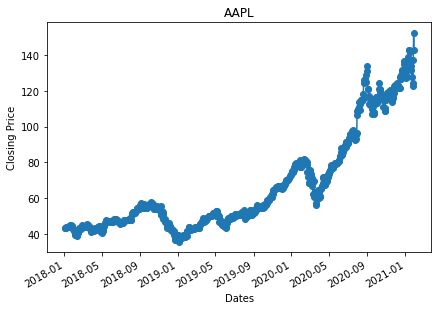

In [340]:
priceGraph("AAPL", startDateMain, stopDateMain)

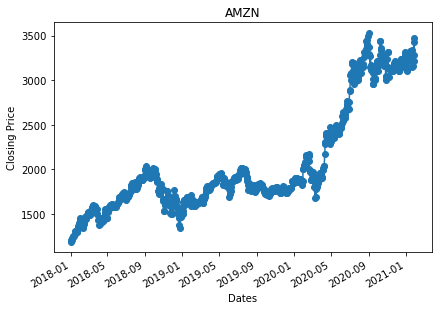

In [341]:
priceGraph("AMZN", startDateMain, stopDateMain)

On the other hand, stocks like AMC, even though they have high growth, are not volatile. The spike in AMC in 2021 is because of Elon Musk tweeted about it **(Blatant Market Manipulation)**

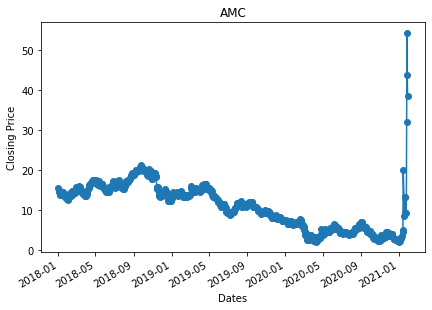

In [343]:
priceGraph("AMC", startDateMain, stopDateMain)

## Execution

Because the stocks are the least volatile, they are more likely to be more stable in the future. 

**Because of this, we decided to invest money in Amazon and Apple**

![title](apple.png)
![title](amazon.png)